## Plotting in python with `matplotlib`

There are a number of excellent plotting libraries for Python, including `matplotlib`, `seaborn`, `plotly`, `bokeh`, `mayavi`, and more. Some of these packages use each other, and they each specialize in some particular component of plotting (for example, interactive plots for websites).

That said, `matplotlib` is by far the most mature, popular, and recommended plotting library for the majority of your needs. It empowers you to produce just about any data visualization you can imagine, and you can use it to produce publication-quality figures. To get inspired, I encourage you to scroll through <a href="http://matplotlib.org/gallery.html"> these examples</a> that demonstrate the extent of `matplotlib`'s capabilities.

In this lesson, we will learn `matplotlib` basics from the ground up, giving you an introduction on how to use this package to make figures. For this tutorial, I will assume that you are already familiar with some Python, including the basics of the numerical computing package NumPy.

\* A note about versions: `matplotlib` recently released a major update that dramatically improved many parts of the package. I suggest you update to `matplotlib 2.0` (in anaconda environments, this can be done using `conda update matplotlib`).

---

### A quick note on data formats

Because this session focuses on plotting data, I will not extensively cover the highly related topic of data formats. 

For this reason, the example data I use will consist of very simple `numpy` arrays: the most common way to store scientific data in Python.

Most of your data, whether it is stored in CSV files, MATLAB files, image files (tif, etc.), json, HDF5, or anything else, can easily be imported into Python and specifically into `numpy` arrays.

For now, let's generate some data to play with:

In [1]:
%matplotlib inline

import numpy as np

x = np.arange(0, 10, 0.05) # uniform array of real values from 0 to 10
y = np.sin(6*x) + np.sin(3*(x-0.5)) # a sum of two sinusoids, as an example dataset

---

### Basic plotting

To begin, let's import the module that contains most of our plotting needs: `pyplot`.

*Note: it is very common for people to import pyplot as `plt`; my use of `pl` is just a personal preference.*

In [3]:
import matplotlib.pyplot as pl
pl.style.use('default')

Basic plotting can be done using commands available directly in the `pyplot` namespace. This is similar to MATLAB-style plotting commands.

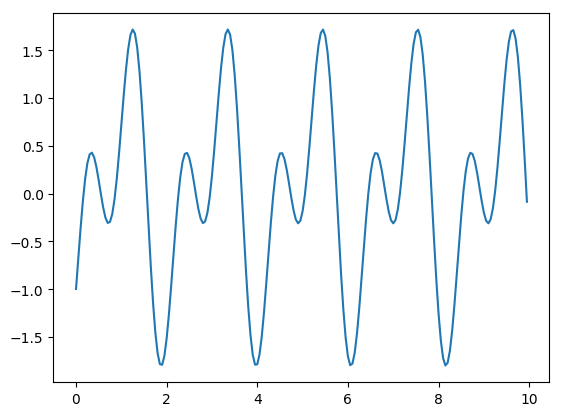

In [4]:
# plot the data
pl.plot(x, y)

For simple formatting options, this shortcut exists:

In [4]:
pl.plot(x, y, 'bo-')

In [5]:
pl.plot(x, -y, 'rx--')

For more complex formatting:

In [6]:
pl.clf()

pl.plot(x, y, 
        color='slateblue', 
        marker='p', 
        linewidth=3, 
        markersize=10,
        markeredgewidth=2, 
        markeredgecolor='black',
        markerfacecolor='moccasin',
        linestyle='dashdot')

A large number of plot styles are available:

In [7]:
# scatter plot

pl.clf()

pl.scatter(x, y, s=(y+5)**2, c=x)

# s specifies marker sizes for each point
# c specifies marker colors for each point

In [8]:
# pie chart

pl.clf()

slices = [10, 20, 30, 40]
colors = ['gray', 'coral', 'goldenrod', 'indigo']
explode = [.05, .05, .01, .08]

pl.pie(slices, colors=colors, explode=explode, autopct='%0.0f')

([<matplotlib.patches.Wedge at 0x118675358>,
  <matplotlib.text.Text at 0x11868f630>])

In [9]:
# histogram

pl.clf()
pl.hist(y, bins=-np.arange(1,0,-.2),edgecolor='k')

(array([  8.,   4.,   4.,  23.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2]),
 <a list of 4 Patch objects>)

In [10]:
# bar chart

pl.clf()

xs = np.array([0, 1, 2, 3])
y1 = [.5, .6, .2, .3]
y2 = [.1, .2, .4, .35]
y3 = [.3, .1, .6, .2]

pl.bar(xs, y1, width=0.2, color='powderblue')
pl.bar(xs+.2, y2, width=0.2, color='cadetblue')
pl.bar(xs+.4, y3, width=0.2, color='seagreen')

<Container object of 4 artists>

In [11]:
# box plot

pl.clf()

group_1 = np.random.normal(0, 1, size=5000)
group_2 = np.random.normal(2, 1, size=5000)
group_3 = np.random.normal(0, 4, size=5000)
group_4 = np.random.normal(-1, 3, size=5000)

pl.boxplot([group_1, group_2, group_3, group_4])

{'boxes': [<matplotlib.lines.Line2D at 0x1187aea20>,
 'caps': [<matplotlib.lines.Line2D at 0x1187b5dd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1187c1d30>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1187bce48>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1187aec88>,
  <matplotlib.lines.Line2D at 0x1187f5860>]}

In [12]:
# error bars

pl.clf()

x1 = x[:100]
y1 = y[:100]

pl.errorbar(x1, y1, yerr=x1/20, xerr=y1/10, color='k', marker='o', ecolor='goldenrod')

<Container object of 3 artists>

In [13]:
# quiver plot

pl.clf()

xpos, ypos = np.meshgrid(np.arange(0, np.pi, .3), np.arange(0, 2*np.pi, .3))
x_comp = np.cos(xpos)
y_comp = np.sin(ypos)

pl.quiver(xpos, ypos, x_comp, y_comp)

In [14]:
# fill between

pl.clf()

pl.plot(x, y, color='k', linewidth=3)

yerror = np.random.uniform(.6, .9, size=y.shape)

pl.fill_between(x, y+yerror, y-yerror, color='powderblue', alpha=.8)

Now that we've seen some of the plot styles available, let's consider how we would customize a given plot, using our original example as a template.

In [15]:
pl.clf()

pl.plot(x, y, color='grey')

pl.xlabel('Time (sec.)', fontsize='large', weight='bold')
pl.ylabel('Amplitude', fontsize='large', style='italic')
pl.title('My Fake Data', fontsize='x-large')

In [16]:
pl.xlim(0,4)

pl.ylim(-.5,1.8)

(-0.5, 1.8)

In [17]:
pl.axis([0, 1.6, -0.5, 1.6])

[0, 1.6, -0.5, 1.6]

In [18]:
pl.xticks( np.arange(0,4,0.2), rotation=90 )

pl.yticks( [0, .5, 1.], ['low','medium','high'], rotation=30 )

([<matplotlib.axis.YTick at 0x1188d9f60>,
 <a list of 3 Text yticklabel objects>)

In [19]:
pl.tight_layout() # squeeze everything into the figure in a non-overlapping way

What if you want to label each line, and show the labels in a legend?

In [20]:
pl.clf()

pl.plot(x, y, color='black', label='my black data')
pl.plot(x, y/2, color='cyan', label='my cyan data')
pl.plot(x, -y, color='pink', label='my pink data')

pl.legend()

The previous example showed one way to plots multiple lines of data. But what if you have a large amount of structured data to plot?

One option would be to plot the individual lines using a loop, and that can sometimes be the best option. But another option exists:

In [21]:
pl.clf()

# create a matrix with multiple transformations of y
y_many = np.array([ y,
                    y+2,
                    y*2,
                    -y ])

# the way we created it, the default shape has timepoints along the columns
print('Original shape:', y_many.shape)

# matplotlib wants a matrix where timepoints are in the rows; i.e. for every entry in x, there is a *row* in y
# to achieve this, we can simply transpose the matrix
y_many = y_many.T
print('New shape:', y_many.shape)

# we can now plot multiple lines at once
pl.plot(x, y_many)

Original shape: (4, 200)
New shape: (200, 4)


Speaking of plotting multiple data lines at once: sometimes you want to plot multiple lines of data on top of one another, but they have different magnitudes of values. Later we will learn a more advanced view of `matplotlib` that allows this to arbitrary levels of complexity. 

But, there is a simple shortcut for the case of plotting data with 2 distinct y axes:

In [22]:
pl.clf()

pl.plot(x, y, color='violet')
pl.ylabel('My Original Data', color='violet')

pl.twinx()

pl.plot(x, -y*1000, color='red')
pl.ylabel('My Larger Data', color='red')

pl.tight_layout()

### Saving a figure

`matplotlib` is able to save plots to many different image formats. To save a figure:

In [23]:
pl.savefig('my_figure.png')

pl.close()

Available formats include png, jpg, pdf, eps, svg, ps (the latter 4 are compatible with vector editing software such as Adobe Illustrator).

### Images

There's lots more you can do with data plotting, but let's now take a brief look at the image functionality available in `matplotlib`.

Recall that an image is no more than a matrix of values. `matplotlib` offers a variety of ways to visualize matrices, and thus to show images.

In [24]:
apple = pl.imread('apple.png')

pl.imshow(apple)
pl.colorbar()
apple.dtype

dtype('float32')

When an image has only one channel, it is often assumed to be greyscale. In `matplotlib`, the default behaviour is to show the image with a standard colormap, which maps values to a range of colours.

To see all of `matplotlib`'s colormaps, see <a href="http://matplotlib.org/examples/color/colormaps_reference.html">this page.</a>

In [25]:
pl.clf()

pl.imshow(apple, cmap=pl.cm.Greys_r)
pl.colorbar()

In [26]:
pl.clf()

pl.imshow(apple, cmap=pl.cm.jet)
pl.colorbar()

In [27]:
pl.clf()

pl.imshow(apple, cmap=pl.cm.Reds_r)
pl.colorbar()

In [28]:
pl.clf()

pl.imshow(apple, cmap=pl.cm.Greens_r)
pl.colorbar()

By default, `matplotlib` will map the full range of values in your image matrix to a colormap. However, you can easily specify any range of your choosing to be mapped. For example, here we will inspect the minimum and maximum value of our image, then tell `imshow` to map only a small range thereof onto the colormap.

In [29]:
print( apple.min() )
print( apple.max() )

0.0
1.0


In [30]:
pl.clf()

pl.imshow(apple, cmap=pl.cm.Greens_r, vmin=0.85, vmax=0.9)
pl.colorbar()

You can use `imshow` to display any data stored in 2D matrices. But, that function was made specifically for images. There is another function, `pcolormesh`, intended specifically for generating pseudocolour plots. Here we will generate some fake data and display it using a pseudocolour plot.

In [31]:
pl.clf()

# generate some fake data in a 2D matrix, where:
# the x coordinate will represent time
# the y coordinate will represent individual measured subjects (ex. cells)
# the value of each entry will represent the magnitude of the signal (ex. fluorescence)
impulse = np.random.choice([0,1], size=[50,1000], p=[.98,.02])
kernel = np.exp(-5*np.arange(0,1,0.05))
data = np.array([np.convolve(i,kernel) for i in impulse])

# show the data using a pseudocolour plot
pl.pcolormesh(data)
pl.xlabel('Time (secs)')
pl.ylabel('Cells')
pl.colorbar(label='Fluorescence')

---

On the topic of colours: `matplotlib` offers a variety of ways to specify colours.

First, there is a large set of <a href="http://matplotlib.org/examples/color/named_colors.html">named colours available</a>.

More generally, you can specify any colour by supplying a list of RGBA (red, blue, green, alpha=transparency) values ranging from 0-1, such as (0.1, 0.5, 0.2, 1).

You can also specify colours using hex values, such as '#AB4E12'.

In [32]:
pl.clf()

pl.plot(x, y, color='mediumspringgreen')

pl.plot(x, y+5, color=[.1, .2, .3, 1])

pl.plot(x, y+10, color='#AB4E12')

If you identify a colormap you like, and want to use its colors manually, you can extract them easily. Think of the colormap as ranging from 0-1, and just specify the locations you want:

In [33]:
pl.clf()

values = [0, 0.1, 0.5, 0.6, 0.7, 1]
cmap = pl.cm.jet

colors = cmap(values)

for idx,c in enumerate(colors):
    pl.plot(x, y+idx, color=c)

In [34]:
pl.close()

## The next level: `matplotlib` objects

We have now covered the bare basics of plotting, and with that knowledge alone, you should be able to plot data and create some nice figures.

However, `matplotlib` offers much deeper control of your plots, visualizations, and figures. To understand this functionality, we need to learn a bit about the objects `matplotlib` uses to manipulate figures and data.

### Figures

Think of a `Figure` as the entire window that pops up when you plot something. The `Figure` object is the interface through which you zoom and pan in your plots, save out your plots to files, and open and close windows containing plots.

In [35]:
fig_1 = pl.figure('My First Figure', figsize=[8,3], facecolor='grey')

fig_2 = pl.figure('My Second Figure', figsize=[3,6], facecolor='white')

In [36]:
fig_1.savefig('my_empty_fig1.png')

pl.close('all')

### Axes

Whereas `Figure` objects control the high-level features of your plot windows, `Axes` objects do the bulk of your important work.

Every `Axes` object lives inside a `Figure`, and many `Axes` can exist within a single `Figure`.

An `Axes` object, as the name implies, is a set of (usually) x-y axes that handles the plotting and display of your data points.

If you choose to construct an `Axes` object explicitly (which you will not often do), `matplotlib` will automatically place it into a `Figure`, because all `Axes` exist inside `Figure`s. In this case, supply the `Axes` constructor with 4 points, specifying the left, bottom, width, and height of the `Axes` within the `Figure`, where (0,0) represents the bottom left of the `Figure`, and (1,1) represents the top right.

In [37]:
ax_1 = pl.axes([0.1, 0.1, 0.5, 0.3]) # left, bottom, width, height

Once you have an `Axes` object, you can access a handle to its parent `Figure`:

In [38]:
fig = ax_1.figure

It is possible to create multiple `Axes` and place them all onto a `Figure`, and that can be a good approach for very custom applications. However, in a moment we will discuss layout features in `matplotlib`, which are a good alternative to this manual approach.

---

First, though: you might be wondering: now that I have multiple figures, how do I choose which one to plot in when I run `pl.plot`?

The answer: `matplotlib` always has a "current" `Figure` and `Axes` object. It will by default plot onto that current selection. 

One way to set the "current" figure is to simply click on its window interactively.

Another way, useful for programming with scripts, is to use these functions (I'll let you explore them on your own):
* `pl.gcf` (get current figure)
* `pl.scf` (set current figure)
* `pl.gca` (get current axes)
* `pl.sca` (set current axes)

*At this point I should note: while this approach of using a "current" figure and axes is good at small scales, I find it quite tedious and inefficient when working with more complex workflows. I recommend becoming comfortable with the object-based approaches that follow.*

---

### Layouts

In practice, rather than explicitly specifying where to place your `Axes`, it is often more convenient to use some of `matplotlib`'s special functions for doing so.

For example, you can use the `subplot` function to build a grid of `Axes` arranged into rectangles.

The syntax is: `pl.subplot(<# of rows><# of columns><subplot index to select now>)`

In [39]:
pl.clf()

pl.subplot(241) # note that the first subplot is index *1*; this is an exception to conform with MATLAB conventions
pl.plot(x, y, color='red')

pl.subplot(242)
pl.plot(x, y, color='orange')

pl.subplot(243)
pl.plot(x, y, color='yellow')

pl.subplot(244)
pl.plot(x, y, color='green')

pl.subplot(245)
pl.plot(x, y, color='blue')

pl.subplot(246)
pl.plot(x, y, color='indigo')

pl.subplot(2,4,7) # note that you can also specify it with commas
pl.plot(x, y, color='violet')

The `subplot` function can be useful for quick, easy arrangements, but it does not take full advantage of the subplotting options available.

Let's consider another function, called `subplots`. The goal of `subplots` is to lay out a pre-specified grid of subplots, and then to give you access to each one individually for further actions.

In [40]:
pl.close()

fig, axs = pl.subplots(3, 2, sharex=True, sharey='row')

The above command accomplished a lot. First, it laid out a grid of 3 rows and 2 columns of `Axes` to be used for plotting. In this case, we specified that the x axes of all `Axes` should be synchronized, and the y axes of each row of `Axes` should be synchronized. We will see the consequence of that in a moment.

Importantly, note what the function returned to us:
<ul>
<li>`fig`: the `Figure` object holding all of our new `Axes` objects</li>
<li>`axs`: an array of all our new `Axes` objects</li>
</ul>

Let's inspect `axs`:

In [41]:
print( 'The axs object has shape', axs.shape )

print( 'The first item in axs is:', axs[0,0] )

print( 'The last item in axs is:', axs[-1,-1] )

The axs object has shape (3, 2)
The first item in axs is: Axes(0.125,0.653529;0.352273x0.226471)
The last item in axs is: Axes(0.547727,0.11;0.352273x0.226471)


The `axs` variable is 3x2 array, meaning it is shaped just like the physical layout of our `Axes` within the figure.

Each element in the array is an `Axes` object. Why would we want access to this object?

It turns out that most of the `matplotlib` commands we have learned so far, which we accessed using `pl.command`, are in some sense shortcuts for the commands offered by `Axes`.

In [42]:
ax = axs[2,0]

ax.plot(x, y, linewidth=5)
ax.set_ylabel('My y label')
ax.set_title('My title')

In [43]:
ax.clear()

Controlling `Axes` objects directly is a more powerful approach than our previous one. To get a sense for why that is, consider this block of code:

In [44]:
# define 3 colours, one for each row
colors = ['red', 'blue', 'tan']

# define 2 line widths, one for each column
linewidths = [2, 5]

# iterate each row
for row_idx in range(axs.shape[0]):
   
    # iterate through each column in this row
    for col_idx in range(axs.shape[1]):
        
        # retrieve the Axes object at this row-column coordinate
        ax = axs[row_idx, col_idx]
        
        # plot the data using the parameters for this particular location
        ax.plot(x, y, color=colors[row_idx], linewidth=linewidths[col_idx])
        ax.set_title('I am in row {}, column {}'.format(row_idx, col_idx))

The most powerful way to build and customize your plots is to use a scheme like the one shown above.

---

For many applications, you might want a more complex layout of subplots. Of course, you can always position the subplots as you wish by defining coordinates of `Axes` objects, but `matplotlib` offers another tool for adding a layer of complexity to the layout.

In [45]:
from matplotlib.gridspec import GridSpec

rows = 2
columns = 4

gs = GridSpec(nrows=rows, 
              ncols=columns, 
              left=0.1, 
              bottom=0.2, 
              right=0.9, 
              top=0.7, 
              wspace=0.01, 
              hspace=0.1, 
              width_ratios=[1,3,1,1],
              height_ratios=[1,2])

fig = pl.figure('My GridSpec Example #1')

for row in range(rows):
    for col in range(columns):
        ax = fig.add_subplot(gs[row,col])
        ax.plot(x,y)

In [46]:
pl.close()

# define a new gridspec
rows = 12
columns = 12
gs = GridSpec(nrows=rows, 
              ncols=columns)

# create the figure
fig = pl.figure('My GridSpec Example #2')


# display empty axes to show positions of gridspec
for r in range(rows):
    for c in range(columns):
        ax = fig.add_subplot(gs[r,c], facecolor='gray')
        ax.patch.set_alpha(.2)
        ax.set_xticks([])
        ax.set_yticks([])


# create some axes using ranges of the gridspec
ax1 = fig.add_subplot(gs[0:12,0:3])
ax1.plot(x, y, color='pink', linestyle='--')

ax2 = fig.add_subplot(gs[0:6,3:7])
ax2.plot(x, y, color='brown')

ax2 = fig.add_subplot(gs[8:,5:])
ax2.plot(x, y, color='green')

In [47]:
pl.close('all')

---

Now that we've learned a bit about how to construct layouts, let's return to the discussion of `matplotlib` objects.

We have already seen that we can get handles to `Figure` objects and `Axes` objects. It turns out that every single thing you display with `matplotlib` has an associated object handle.

In [48]:
ax = pl.subplot(111)

line, = ax.plot(x, y)

In [49]:
print( line.get_ydata() )

[ -9.97494987e-01  -6.80203151e-01  -3.67396613e-01  -8.40963160e-02
   1.48712176e-01   3.15856227e-01   4.09205157e-01   4.28243833e-01
   3.79942974e-01   2.77941748e-01   1.41120008e-01  -8.30756167e-03
  -1.47000237e-01  -2.52800625e-01  -3.06933299e-01  -2.95891358e-01
  -2.12837699e-01  -5.83914567e-02   1.59274598e-01   4.25037815e-01
   7.18079488e-01   1.01367893e+00   1.28538899e+00   1.50739948e+00
   1.65687723e+00   1.71607317e+00   1.67400653e+00   1.52757353e+00
   1.28197879e+00   9.50447242e-01   5.53238493e-01   1.16047176e-01
  -3.32072475e-01  -7.61077406e-01  -1.14239513e+00  -1.45125708e+00
  -1.66870239e+00  -1.78307784e+00  -1.79090430e+00  -1.69703616e+00
  -1.51410304e+00  -1.26128623e+00  -9.62541562e-01  -6.44428630e-01
  -3.33741168e-01  -5.51500669e-02   1.70931182e-01   3.30069531e-01
   4.14972234e-01   4.25982813e-01   3.70872342e-01   2.63948664e-01
   1.24567553e-01  -2.48164755e-02  -1.60880623e-01  -2.61741269e-01
  -3.09127269e-01  -2.90220060e-01

In [50]:
ax.clear()

ys = np.array([y+2*i for i in range(20)]).T # to plot multiple lines, first axis corresponds to sequential x values

lines = ax.plot(x, ys) # read out the line handles into a variable

If you hold the line handles in a variable, you can edit the data at any time.

In [51]:
for idx,line in enumerate(lines):
    line.set_linewidth(idx)

In [52]:
for idx,line in enumerate(lines):
    if idx%2 == 0:
        line.set_xdata(x+.5)

In [53]:
for line in lines:
    line.set_marker('x')
    line.set_markersize(25)

In fact, you can grab and edit any visible component of a plot:

In [54]:
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(5)
ax.spines['left'].set_color('pink')
ax.spines['top'].set_linestyle('--')

In [55]:
for lab in ax.get_xticklabels():
    lab.set_color(np.random.random(size=4))
    lab.set_fontsize(np.random.randint(10,30))

In [56]:
pl.close('all')

At this point, you should have an understanding of how `matplotlib` represents plots and data.

---

There is another important topic we have not yet covered. What if you want to place text, other than axis labels and titles, onto your plots?

There are 3 basic ways to accomplish this, depending on your specific needs.

The first, and simplest, is to use `Axes.text`:

In [57]:
ax = pl.subplot(111)

ax.plot(x, y, color='c')

ax.text(0.5, 0.75, 'hello there') # x-coord, y-coord, text

In [58]:
ax.text(7, 0.2, 'hello again',
        horizontalalignment='center',
        rotation=45,
        fontsize='x-large',
        color='red')

Sometimes, you might want to place some text with the goal of annotating a particular piece of your data.

In that case, `Axes.annotate` is very useful:

In [59]:
ax.clear()

ax.plot(x, y, color='gray')

In [60]:

point_of_interest = 32

xval = x[point_of_interest]
yval = y[point_of_interest]

ax.annotate('Point of Interest', 
            xy=(xval, yval), 
            xytext=(xval+.5, yval+1), 
            arrowprops={'width':3})

Finally, suppose you want to place some text in the figure, not related to the data or `Axes` coordinates:

In [61]:
fig = ax.figure

fig.text(0.05, .95, "I'm up here!", color='pink')

*Note for aficionados: on the topic of axes vs figure coorindate systems, `matplotlib` offers <a href="http://matplotlib.org/users/transforms_tutorial.html">an excellent suite of functions</a> for coordinate transformations.*

`matplotlib` also offers the ability to include mathematical expressions using LaTeX conventions:

In [62]:
ax.clear()
fig.text(.5, .5, 
         r'$ e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} \ldots = \sum_{n=0}^{\infty}\frac{x^n}{n!} $',
        fontsize='large',
        ha='center')

In [63]:
pl.close('all')

---

### Patches

All of the plots you have seen, including the lines, dots, bars, axes, words, etc. are made of simpler building blocks: shapes and colours.

`matplotlib` gives you access to all of these shapes.

In [64]:
circle1 = pl.Circle(xy=[-5,5], radius=3, color='turquoise')
circle2 = pl.Circle(xy=[-5,5], radius=1, color='k')
circle3 = pl.Circle(xy=[5,5], radius=3, color='turquoise')
circle4 = pl.Circle(xy=[5,5], radius=1, color='k')

arrow = pl.Arrow(x=0, y=3, dx=0, dy=-2, color='chocolate', linewidth=15)

rects1 = [pl.Rectangle(xy=[i,-1.5], width=1, height=1, facecolor='lightyellow', edgecolor='k') for i in np.arange(-6,6)]
rects2 = [pl.Rectangle(xy=[i,-3.5], width=1, height=1, facecolor='lightyellow', edgecolor='k') for i in np.arange(-6,6)]

ax = pl.subplot(111)

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)

ax.add_patch(arrow)

for rect in rects1 + rects2:
    ax.add_patch(rect)

ax.axis('equal')

(-8.8000000000000007,
 8.8000000000000007,
 -4.0750000000000002,
 8.5749999999999993)

Since a plot is just composed of patches like these, we can get handles to those patches.

In [65]:
pl.clf()
ax = pl.gca()

normal = np.random.normal(size=10000)
counts,bins,patches = ax.hist(normal, bins=60)

In [66]:
for patch in patches:
    patch.set_color(np.random.random(3))

In [67]:
for patch in patches[::2]:
    x,y = patch.get_xy()
    h = patch.get_height()
    patch.set_xy([x,1000])
    patch.set_height(-h)
    
ax.set_ylim(0,1000)

(0, 1000)

---

At this point, I want to briefly touch on a few other advanced features of `matplotlib`.

### 3D plotting

In [68]:
# taken directly from: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#contour-plots

from mpl_toolkits.mplot3d import Axes3D

n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

fig = pl.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

### Animations

In [69]:
pl.close('all')

fig, axs = pl.subplots(1, 2, figsize=(10,5))

# draw a circle
circ = pl.Circle([0,0], 1, color='darkslategrey', linewidth=4)
axs[0].add_patch(circ)
# draw lines over the circle
axs[0].plot([-1,1], [0,0], color='w', lw=.5)
axs[0].plot([0,0], [-1,1], color='w', lw=.5)
circle_line, = axs[0].plot([0,1], [0,0], color='k')
# scale the circle axis
axs[0].axis([-1.2, 1.2, -1.2, 1.2])
axs[0].axis('equal')
axs[0].axis('off')

# create one period of a sine wave
x = np.arange(0, 2*np.pi, 0.05)
y = np.sin(x)
# plot the sine wave
axs[1].plot(x, y, color='maroon', linewidth=5)
# plot a dot and line to follow the sine wave
dot, = axs[1].plot(x[0], y[0], marker='o', markersize=10, color='orange')
sine_line, = axs[1].plot([0,0], [-1,1], color='gray', linestyle='--')
# turn off x axis ticks
axs[1].set_xticks([])

# run an animation
idx = 0
n_iters = 0
while n_iters<5:
    xval = x[idx]
    yval = y[idx]
    
    # update circle display
    x_component = np.cos(xval)
    y_component = np.sin(xval)
    circle_line.set_xdata([0, x_component])
    circle_line.set_ydata([0, y_component])
    
    # update sine wave plot
    sine_line.set_xdata([xval, xval])
    dot.set_xdata(xval)
    dot.set_ydata(yval)
    
    pl.pause(0.001)
    
    idx += 1
    if idx == len(x):
        idx = 0
        n_iters += 1

/Users/Dudi/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/backend_bases.py:2445: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


### Interactivity

In [70]:
fig = pl.figure('Bubbles', figsize=[6,6])
ax = fig.add_axes([0,0,1,1])

def make_circle(event):
    x,y,r = np.random.random(size=3)
    color = np.random.random(size=3)
    circ = pl.Circle((x,y), r/20, color=color)
    ax.add_patch(circ)
    fig.canvas.draw()

ax_button = fig.add_axes([0.4,.45,.2,.1])
button = pl.Button(ax_button, label='Make A Bubble')
button.on_clicked(make_circle)

0

### Backends

I will not cover this topic extensively, but I do want to mention it for the sake of demonstrating one useful feature.

`matplotlib` draws it figures using "backends" - code specific to drawing on different operating systems and using different methods.

iPython (which runs by default in Jupyter notebooks) offers a simple syntax for specifying your matplotlib notebook. And, `matplotlib` has begun to build a comprehensive backend specifically for notebooks like this one.

In [71]:
%matplotlib notebook

pl.plot(x, y)

### Trying things

In [72]:
X = np.arange(0,1,.1)
Y = np.sin(X)
pl.figure(1)
pl.clf()
pl.plot(X,Y)
pl.plot(X,Y)

ax = pl.gca()

XX = ax.get_lines()[1];

print(XX.get_xydata())

[[ 0.          0.        ]
 [ 0.1         0.09983342]
 [ 0.2         0.19866933]
 [ 0.3         0.29552021]
 [ 0.4         0.38941834]
 [ 0.5         0.47942554]
 [ 0.6         0.56464247]
 [ 0.7         0.64421769]
 [ 0.8         0.71735609]
 [ 0.9         0.78332691]]
